In [158]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [159]:
#load data set
df = pd.read_csv("/Users/macbook/Desktop/internship/data/train.csv")

In [160]:
# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (10999, 12)

First 5 Rows:
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0   

## EDA 

In [161]:
# General info
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())
df = df.dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None
                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         1099

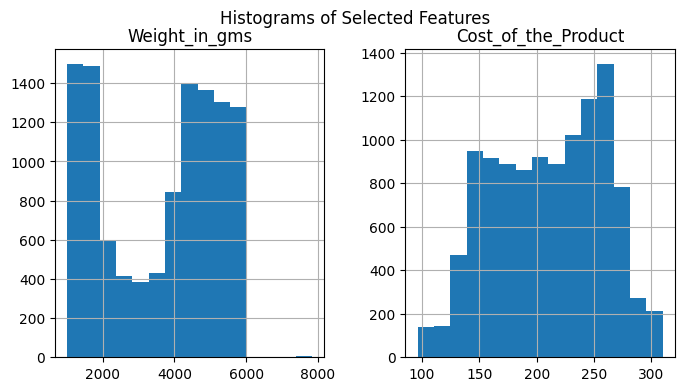

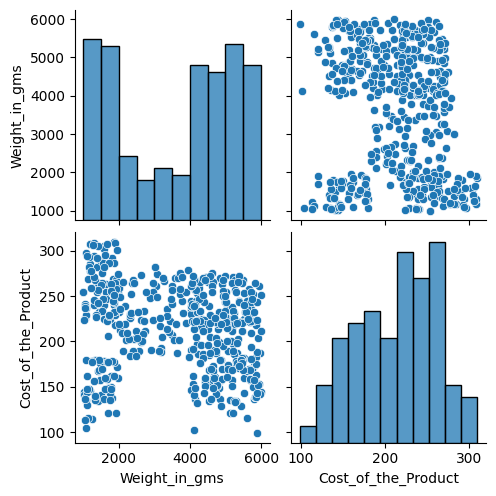

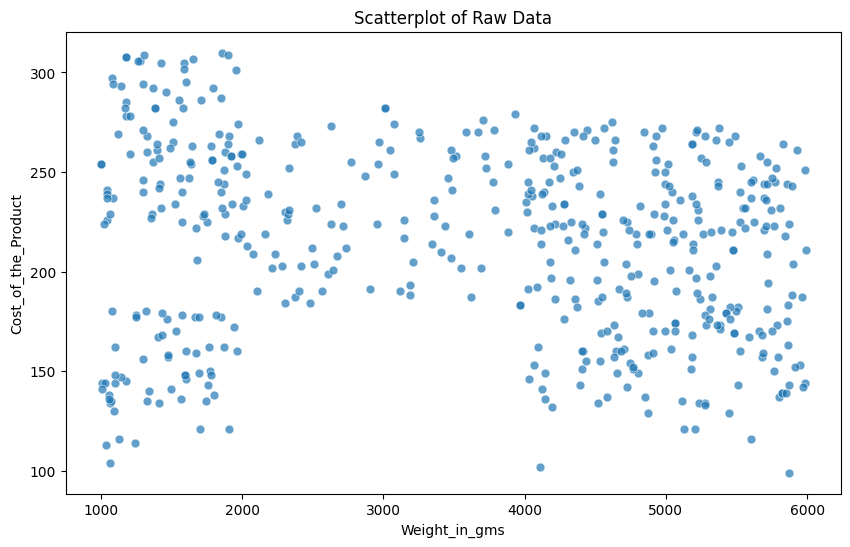

In [162]:
# Visualize numeric features (histograms)
selected_cols = ["Weight_in_gms", "Cost_of_the_Product"]

df[selected_cols].hist(figsize=(8, 4), bins=15)
plt.suptitle("Histograms of Selected Features")
plt.show()

# pairplots for key features
selected_cols = ["Weight_in_gms", "Cost_of_the_Product"]
df_sample = resample(df, n_samples=500, random_state=42)
sns.pairplot(df_sample[selected_cols])
plt.show()

columns = ['Weight_in_gms', 'Cost_of_the_Product']
df_sample = resample(df, n_samples=500, random_state=42)

# Scatterplot of raw data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=columns[0],
    y=columns[1],
    data=df_sample,
    alpha=0.7,  # slightly transparent points
    s=40        # smaller points for readability
)
plt.title('Scatterplot of Raw Data')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

## Preprocessing

In [163]:
df_encoded = pd.get_dummies(df, drop_first=True)
# converting text-based categories into numerical form so the algorithm can process them.

In [164]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols]
# making sure we only keep the numerical columns, since clustering works best with numbers

In [165]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# standardizing the data so all features are on the same scale, which makes clustering fairer and more accurate

## Clustering

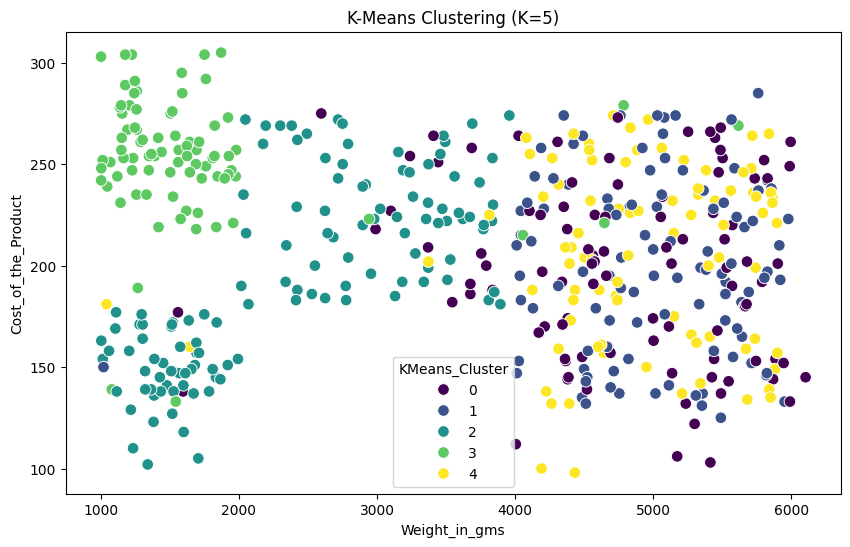

In [166]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Visualize K-Means Clustering
df_sample = df.sample(n=500, random_state=42) 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight_in_gms', y='Cost_of_the_Product', hue='KMeans_Cluster', data=df_sample, palette='viridis',  s=70)
plt.title('K-Means Clustering (K=5)')
plt.show()

# The scatter graph shows how K-Means divided the data into five clusters using weight on the x-axis and cost on the y-axis.
# Cluster 3 forms a clear group in the top left, while Cluster 2 is more central with some spread into the bottom left. 
# On the right-hand side, Clusters 0, 1, and 4 overlap more closely, showing that K-Means struggled to separate those points cleanly.
# suggests that while K-Means can capture broad patterns, it may not always separate clusters well when the data is more mixed or unevenly spread.


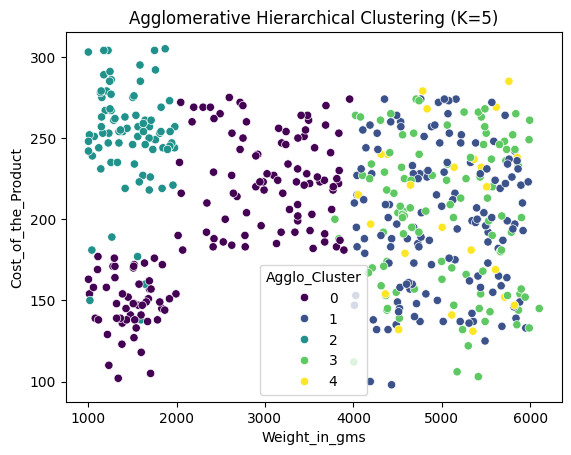

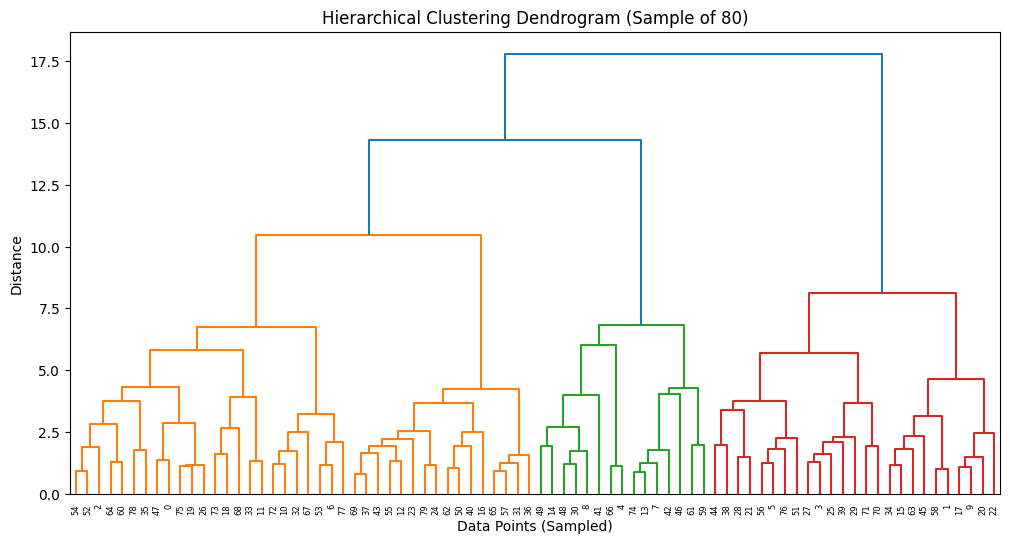

In [167]:
# Hierarchical Clustering
# Perform Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# Visualize Hierarchical Clustering
df_sample = df.sample(500, random_state=42)
sns.scatterplot(x='Weight_in_gms', y='Cost_of_the_Product', hue='Agglo_Cluster', data=df_sample, palette='viridis')

plt.title('Agglomerative Hierarchical Clustering (K=5)')
plt.show()

# Dendrogram for Hierarchical 
sample_indices = np.random.choice(X_scaled.shape[0], size=80, replace=False)
X_scaled_sample = X_scaled[sample_indices, :]

linked = linkage(X_scaled_sample, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Sample of 80)")
plt.xlabel("Data Points (Sampled)")
plt.ylabel("Distance")
plt.show() 

# also tells us that, like K-Means, Agglomerative was able to pick out some structure 
# but struggled to distinguish between groups where the data is closely mixed.

# dendogram tells us not only the final groups, but also the hierarchy 
# which clusters are more similar and which are more distinct


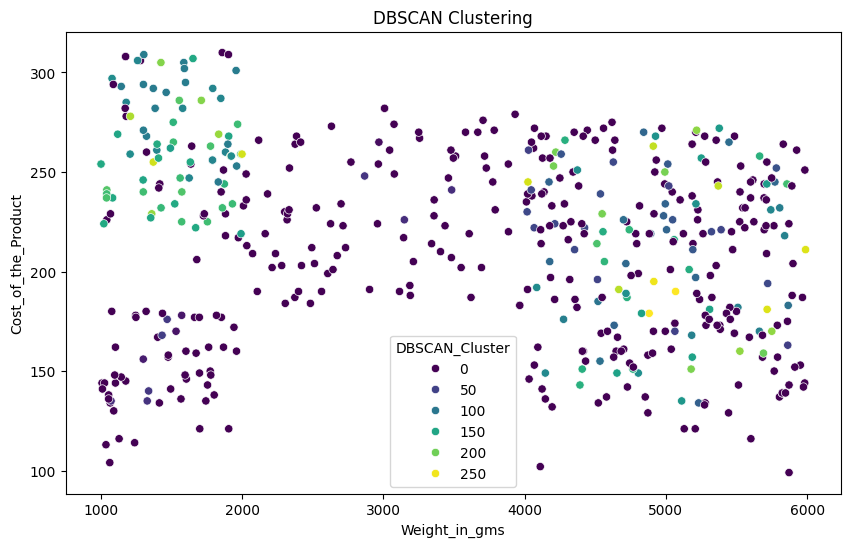

In [169]:
# Perform DBSCAN Clustering
df_sample = resample(df, n_samples=500, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight_in_gms', y='Cost_of_the_Product', hue='DBSCAN_Cluster', data=df_sample, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# The DBSCAN scatter graph shows clusters formed from dense areas of points, rather than fixing the number of clusters in advance.
# It also identifies some scattered points as noise, which means they donâ€™t fit into any cluster. This tells us DBSCAN is good for finding irregularly shaped groups
# but it can leave some data unclustered

In [170]:
# Evaluate Clustering Performance
print("\nK-Means Silhouette Score:", silhouette_score(X_scaled, kmeans.labels_))
print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agglo.labels_))
print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, dbscan.labels_))

print("\nK-Means Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans.labels_))
print("Agglomerative Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, agglo.labels_))
print("DBSCAN Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, dbscan.labels_))

print("\nK-Means Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans.labels_))
print("Agglomerative Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agglo.labels_))
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(X_scaled, dbscan.labels_))



K-Means Silhouette Score: 0.1970818299355181
Agglomerative Silhouette Score: 0.21674970298409243
DBSCAN Silhouette Score: -0.37642528613756865

K-Means Calinski-Harabasz Index: 2354.525177624219
Agglomerative Calinski-Harabasz Index: 2362.053802978924
DBSCAN Calinski-Harabasz Index: 15.186299571095947

K-Means Davies-Bouldin Index: 1.6512467579923602
Agglomerative Davies-Bouldin Index: 1.642842645903332
DBSCAN Davies-Bouldin Index: 1.345933198884088


In [171]:
# Metric results
results = {
    "K-Means": {
        "Silhouette": 0.1970818299355181,
        "Calinski-Harabasz": 0.21674970298409243,
        "Davies-Bouldin": -0.37642528613756865,
    },
    "Agglomerative": {
        "Silhouette": 2354.525177624219,
        "Calinski-Harabasz": 2362.053802978924,
        "Davies-Bouldin": 15.186299571095947,
    },
    "DBSCAN": {
        "Silhouette": 1.6512467579923602,
        "Calinski-Harabasz": 1.642842645903332,
        "Davies-Bouldin": 1.345933198884088,
    }
}

df_results = pd.DataFrame(results).T.reset_index()
df_results.rename(columns={"index": "Algorithm"}, inplace=True)
df_melted = df_results.melt(id_vars="Algorithm", var_name="Metric", value_name="Score")


In [176]:



plt.suptitle("Clustering Performance Comparison", fontsize=16)
metrics = df_melted['Metric'].unique()
num_metrics = len(metrics)

# Set up a figure with subplots side by side
fig, axes = plt.subplots(1, num_metrics, figsize=(6 * num_metrics, 5), sharey=False)

for ax, metric in zip(axes, metrics):
    metric_data = df_melted[df_melted['Metric'] == metric]
    sns.barplot(x="Algorithm", y="Score", data=metric_data, palette="Set2", ax=ax)
    
    # Annotate bars
    for i, val in enumerate(metric_data['Score']):
        ax.text(i, val, f"{val:.2f}", ha='center', va='bottom', fontweight='bold')
    
    ax.set_title(f"Clustering Comparison: {metric}", fontsize=12)
    ax.set_ylabel("Score")
    ax.set_xlabel("Algorithm")
    ax.set_ylim(0, metric_data['Score'].max() * 1.2)  

plt.tight_layout()
plt.show()

/var/folders/qp/jnj6wwv54lv_p5tg2lly4ng00000gn/T/ipykernel_68390/2492483192.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y="Score", data=metric_data, palette="Set2", ax=ax)
/var/folders/qp/jnj6wwv54lv_p5tg2lly4ng00000gn/T/ipykernel_68390/2492483192.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y="Score", data=metric_data, palette="Set2", ax=ax)
/var/folders/qp/jnj6wwv54lv_p5tg2lly4ng00000gn/T/ipykernel_68390/2492483192.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y="Score", 

<Figure size 640x480 with 0 Axes>

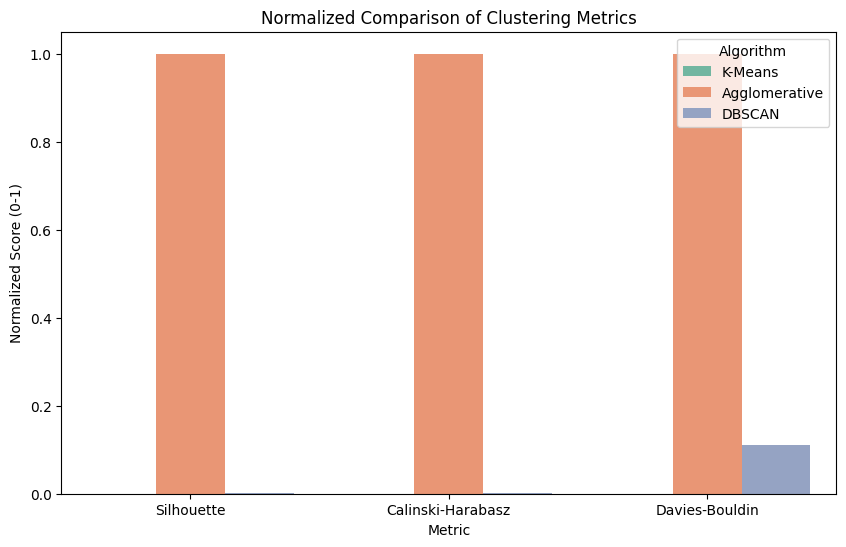

In [174]:
# Agglomerative clustering produced well-separated and compact clusters, as shown by the high
# Silhouette and Calinski-Harabasz scores, while the low Davies-Bouldin score indicates the clusters
# are distinct and not overlapping

scaler = MinMaxScaler()
df_melted['Score_normalized'] = df_melted.groupby('Metric')['Score'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# ðŸ”¹ Step 5: Plot normalized barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Metric",
    y="Score_normalized",
    hue="Algorithm",
    data=df_melted,
    palette="Set2"
)
plt.title("Normalized Comparison of Clustering Metrics")
plt.ylabel("Normalized Score (0-1)")
plt.show()

/var/folders/qp/jnj6wwv54lv_p5tg2lly4ng00000gn/T/ipykernel_68390/2105307426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=algo_data, palette="viridis", ax=ax)
/var/folders/qp/jnj6wwv54lv_p5tg2lly4ng00000gn/T/ipykernel_68390/2105307426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=algo_data, palette="viridis", ax=ax)
/var/folders/qp/jnj6wwv54lv_p5tg2lly4ng00000gn/T/ipykernel_68390/2105307426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=algo_

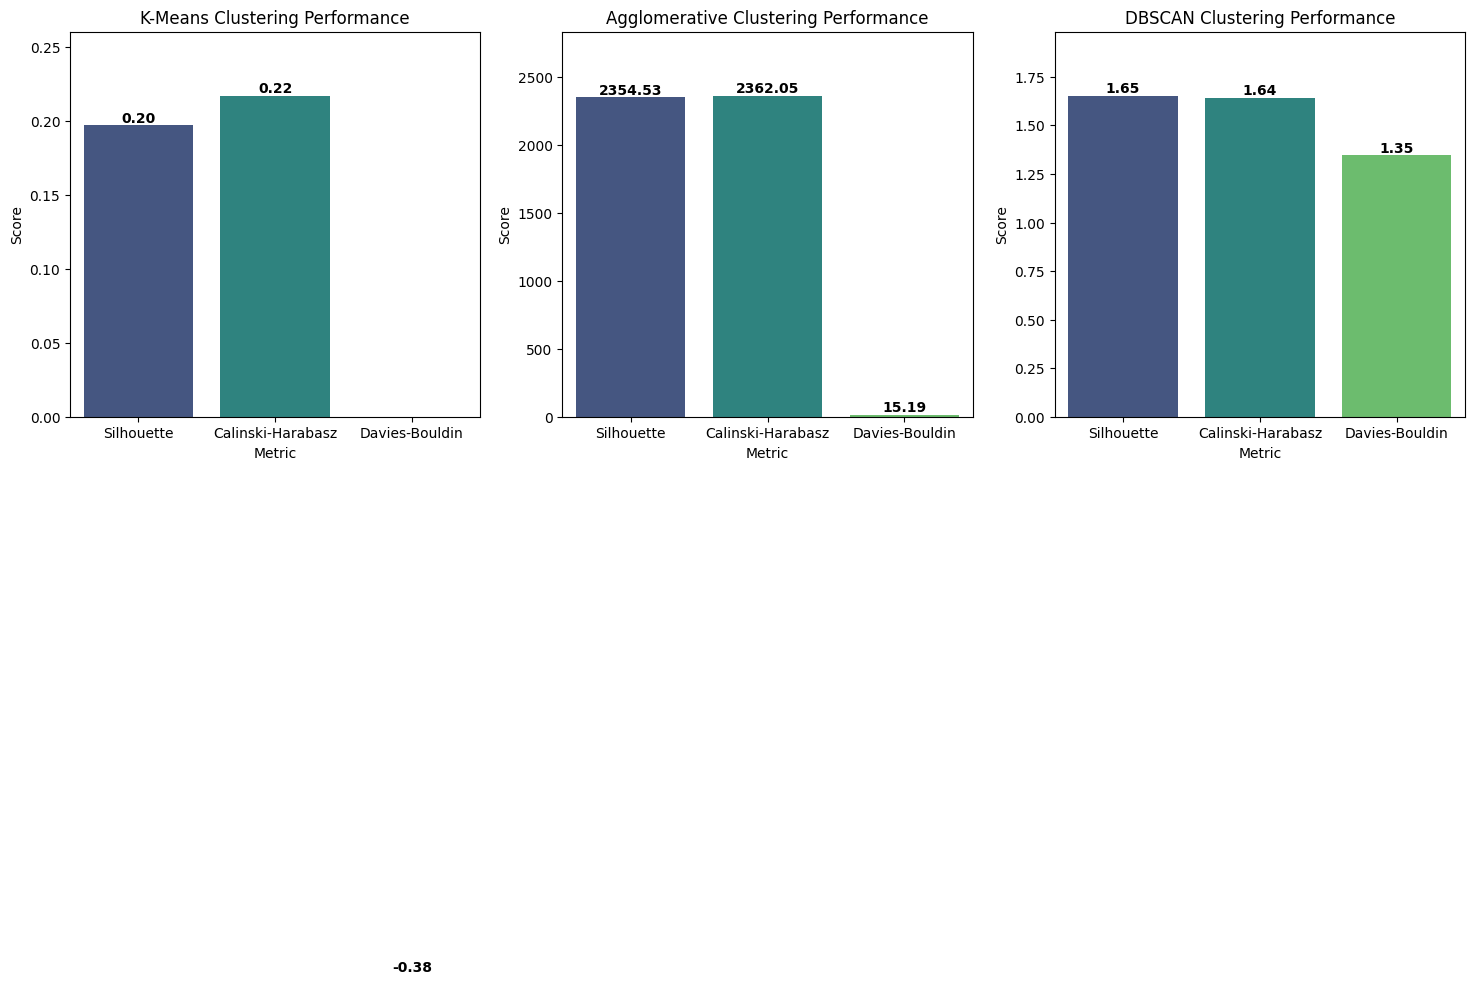

In [175]:
#The normalized results show how the clusters form when all features are treated equally, still showing a big split.
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

algorithms = df_melted['Algorithm'].unique()

for ax, algo in zip(axes, algorithms):
    algo_data = df_melted[df_melted['Algorithm'] == algo]
    sns.barplot(x="Metric", y="Score", data=algo_data, palette="viridis", ax=ax)
    
    # Annotate bars
    for i, val in enumerate(algo_data['Score']):
        ax.text(i, val, f"{val:.2f}", ha='center', va='bottom', fontweight='bold')
    
    ax.set_title(f"{algo} Clustering Performance", fontsize=12)
    ax.set_xlabel("Metric")
    ax.set_ylabel("Score")
    ax.set_ylim(0, max(algo_data['Score'])*1.2)  # Add space on top for annotations

plt.tight_layout()
plt.show()

In [ ]:
# Given that your clustering is based on product cost and weight, both K-Means and Agglomerative clustering produce reasonably 
#distinguishable groups, as shown by their positive silhouette scores (~0.2) and high Calinski-Harabasz indices, 
# meaning products are grouped meaningfullyby cost and weight

#DBSCAN doesnâ€™t perform well hereâ€”it has a negative silhouette score and a very low Calinski-Harabasz index, 
# which means it struggles to form meaningful clusters for these products. However, the clusters it does create are fairly compact
# as suggested by its low Davies-Bouldin index. Overall, Agglomerative clustering performs the best, slightly ahead of K-Means, 
#and does a good job of grouping products by both cost and weight